In [42]:
#importando bibliotecas necessarias para o projeto 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


* Base de dados da UCI, que faz uma análise de ganhos anuais através do censo de pesquisa, buscando saber os ganhos >= 50K anuais.
* Disponível em: https://archive.ics.uci.edu/ml/datasets/census+income

In [2]:
#abrindo arquivo a ser utilizado para análise
#base de dados contém predição de renda maior que 50K de dolares por ano baseado no censo de dados.
adult_data = pd.read_csv("/Users/kalebeszlachta/Downloads/bradesco_test/adult_data.csv")

In [3]:
# mostrando head do arquivo para inicial avaliação
adult_data.head(30)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
#add header no arquivo de dados, de acordo com as informações dadas no site da base.
headerList = ["age","workclass","fnlwgt","education","education_num","marital_status", "occupation", "relatioship", "race", "sex", "capital_gain", "capital_loss", "Hours/Week", "native_country", "income"]
adult_data.to_csv("adult_data2.csv", header=headerList, index=False)
adult_data2 = pd.read_csv("adult_data2.csv")

In [5]:
# mostrando head do arquivo, após modificação add header
adult_data2.head(30)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relatioship,race,sex,capital_gain,capital_loss,Hours/Week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### problemas vistos: 
* a tabela está mal estruturada
* head inexistente nas colunas, difícil entender o conteúdo a primeira vista sem olhar a documentação da base
* bastante dados com falta de informação
* vários outliers em classes diferentes

### como resolver:
* melhor estruturar a tabela para evitar apenas dados "jogados", criando novas colunas ou remanejando as existentas para melhor visualização dos dados
* limpar dados faltantes
* nomear head para melhor entendimento
* retirar outliers ou filtrá-los para melhor resultado

In [6]:
#mostradno estatistica de cada coluna
adult_data2.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,Hours/Week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


/Users/marosa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marosa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/marosa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

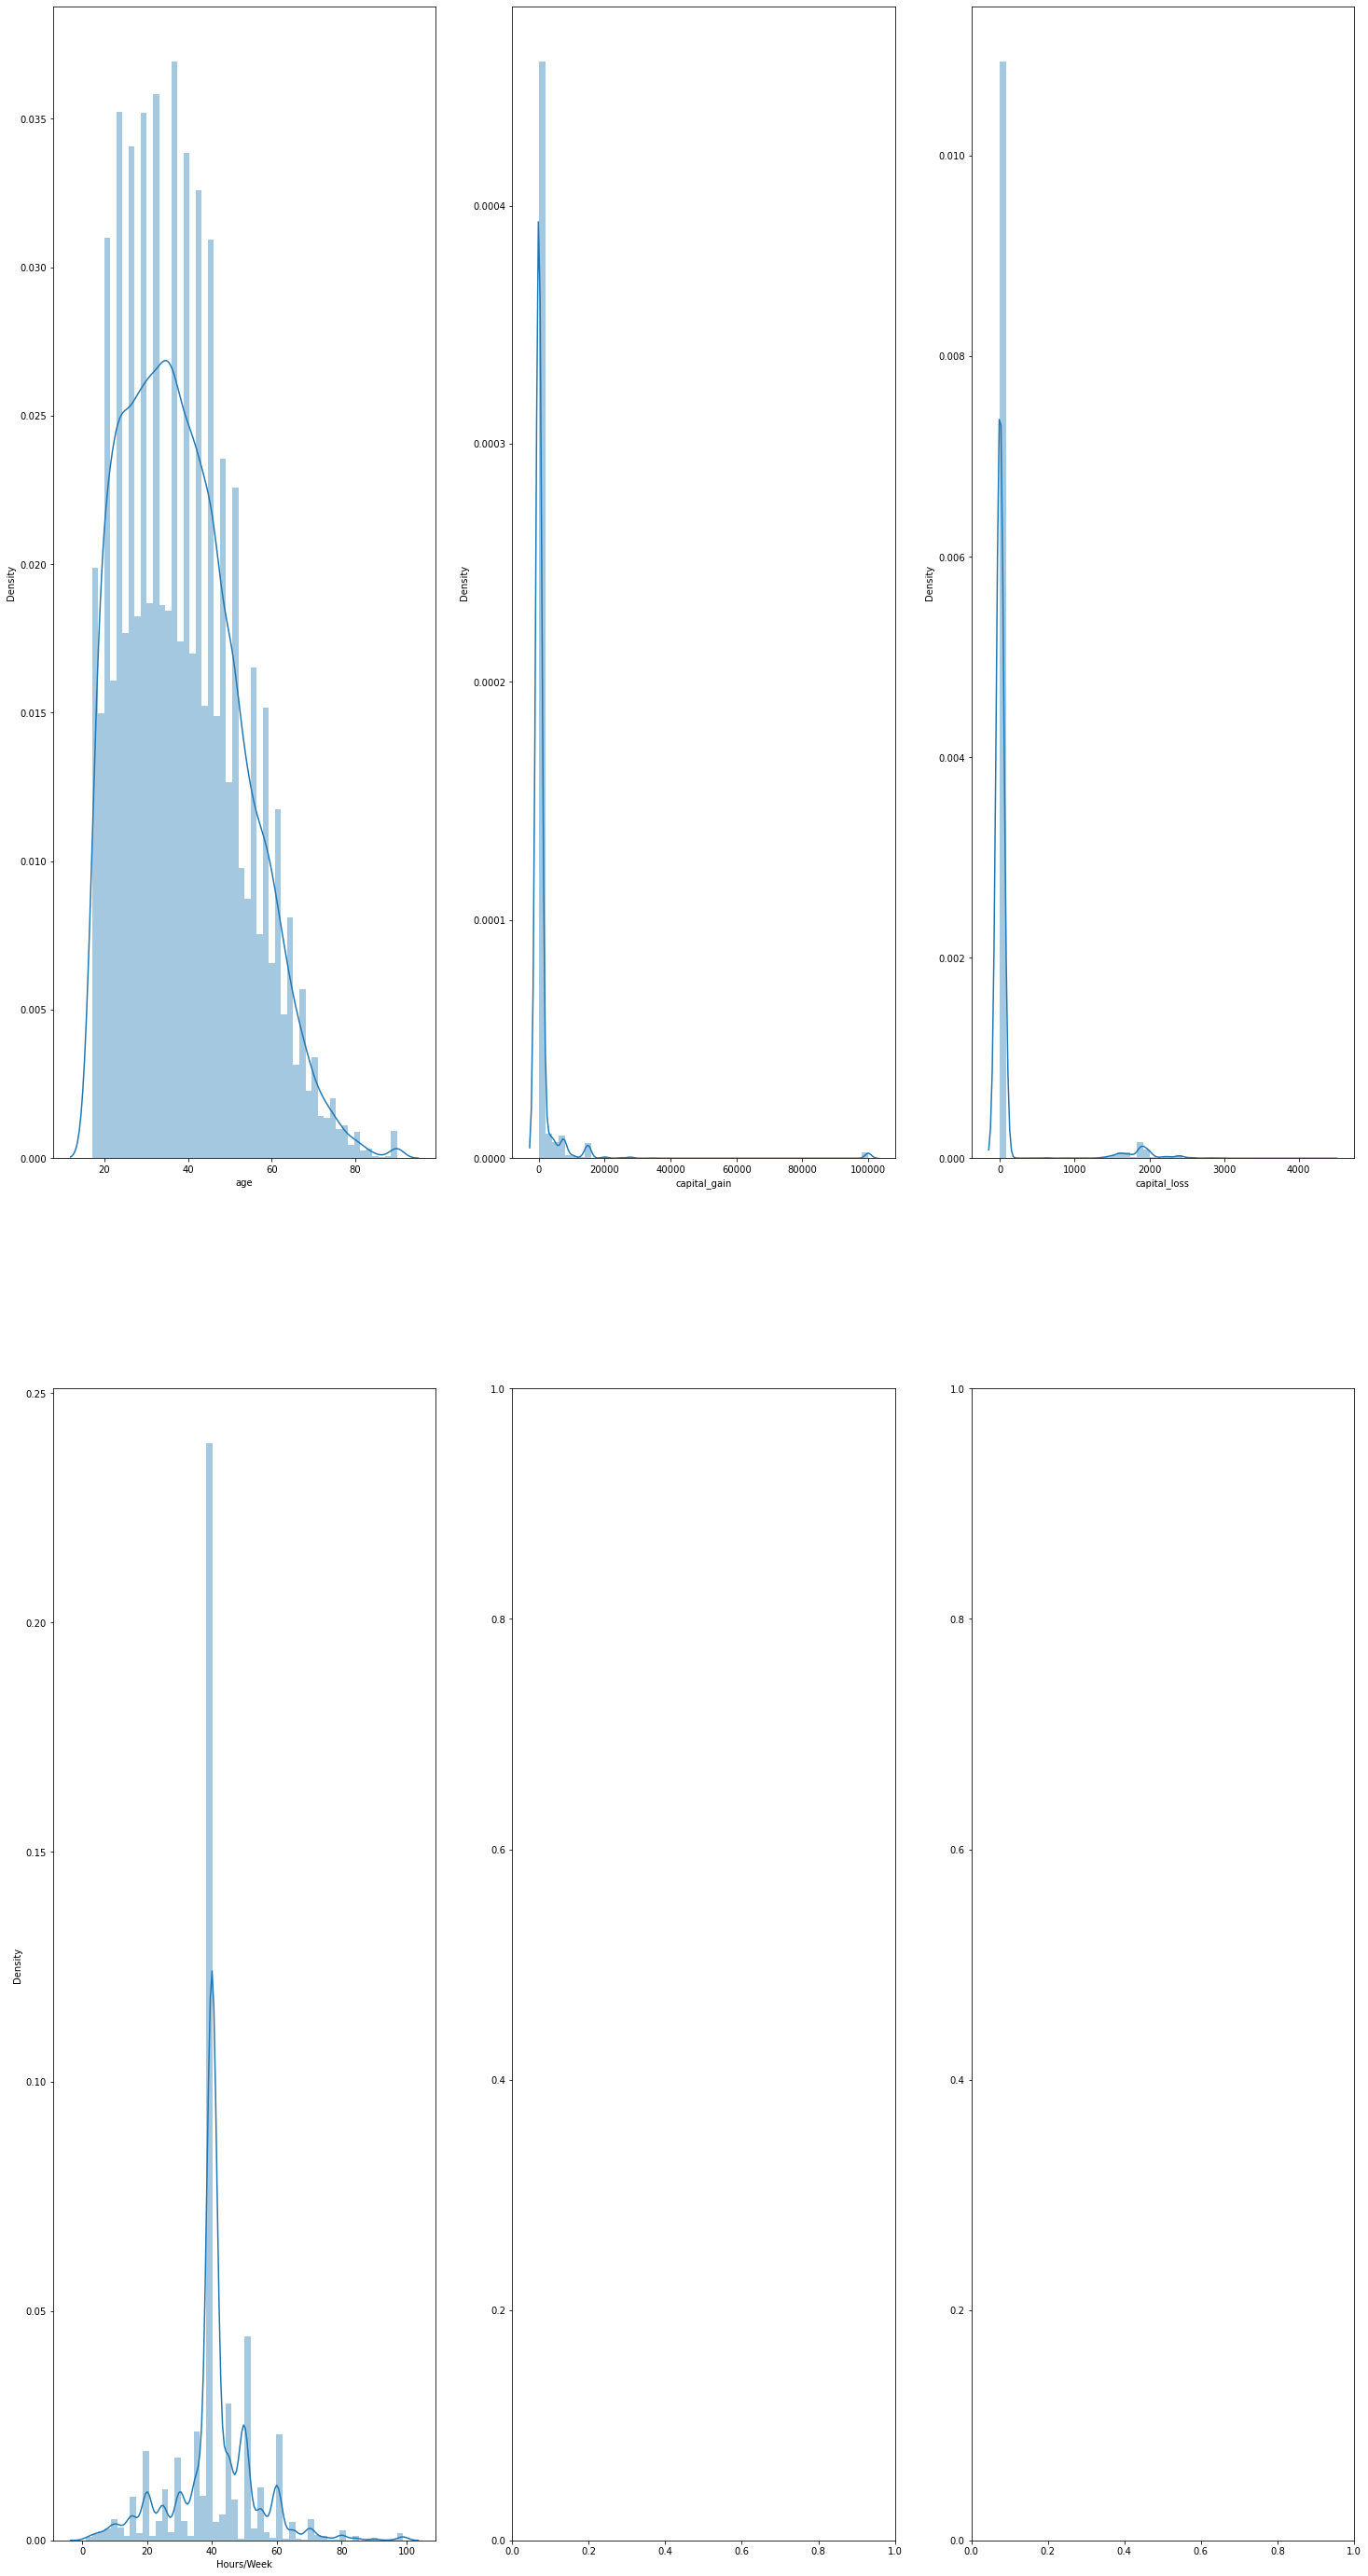

In [7]:
#criando uma lista de variaveis interessantes para analise, e plotando gráficos de distribuição
variaveis_interessantes = ["age","capital_gain","capital_loss","Hours/Week"]

fig, ax = plt.subplots(2,3,figsize=(25,50))
for variable, i in zip(variaveis_interessantes, range(len(variaveis_interessantes))):
  sns.distplot(adult_data2[variable], ax=ax[i//3][i%3])
plt.show()

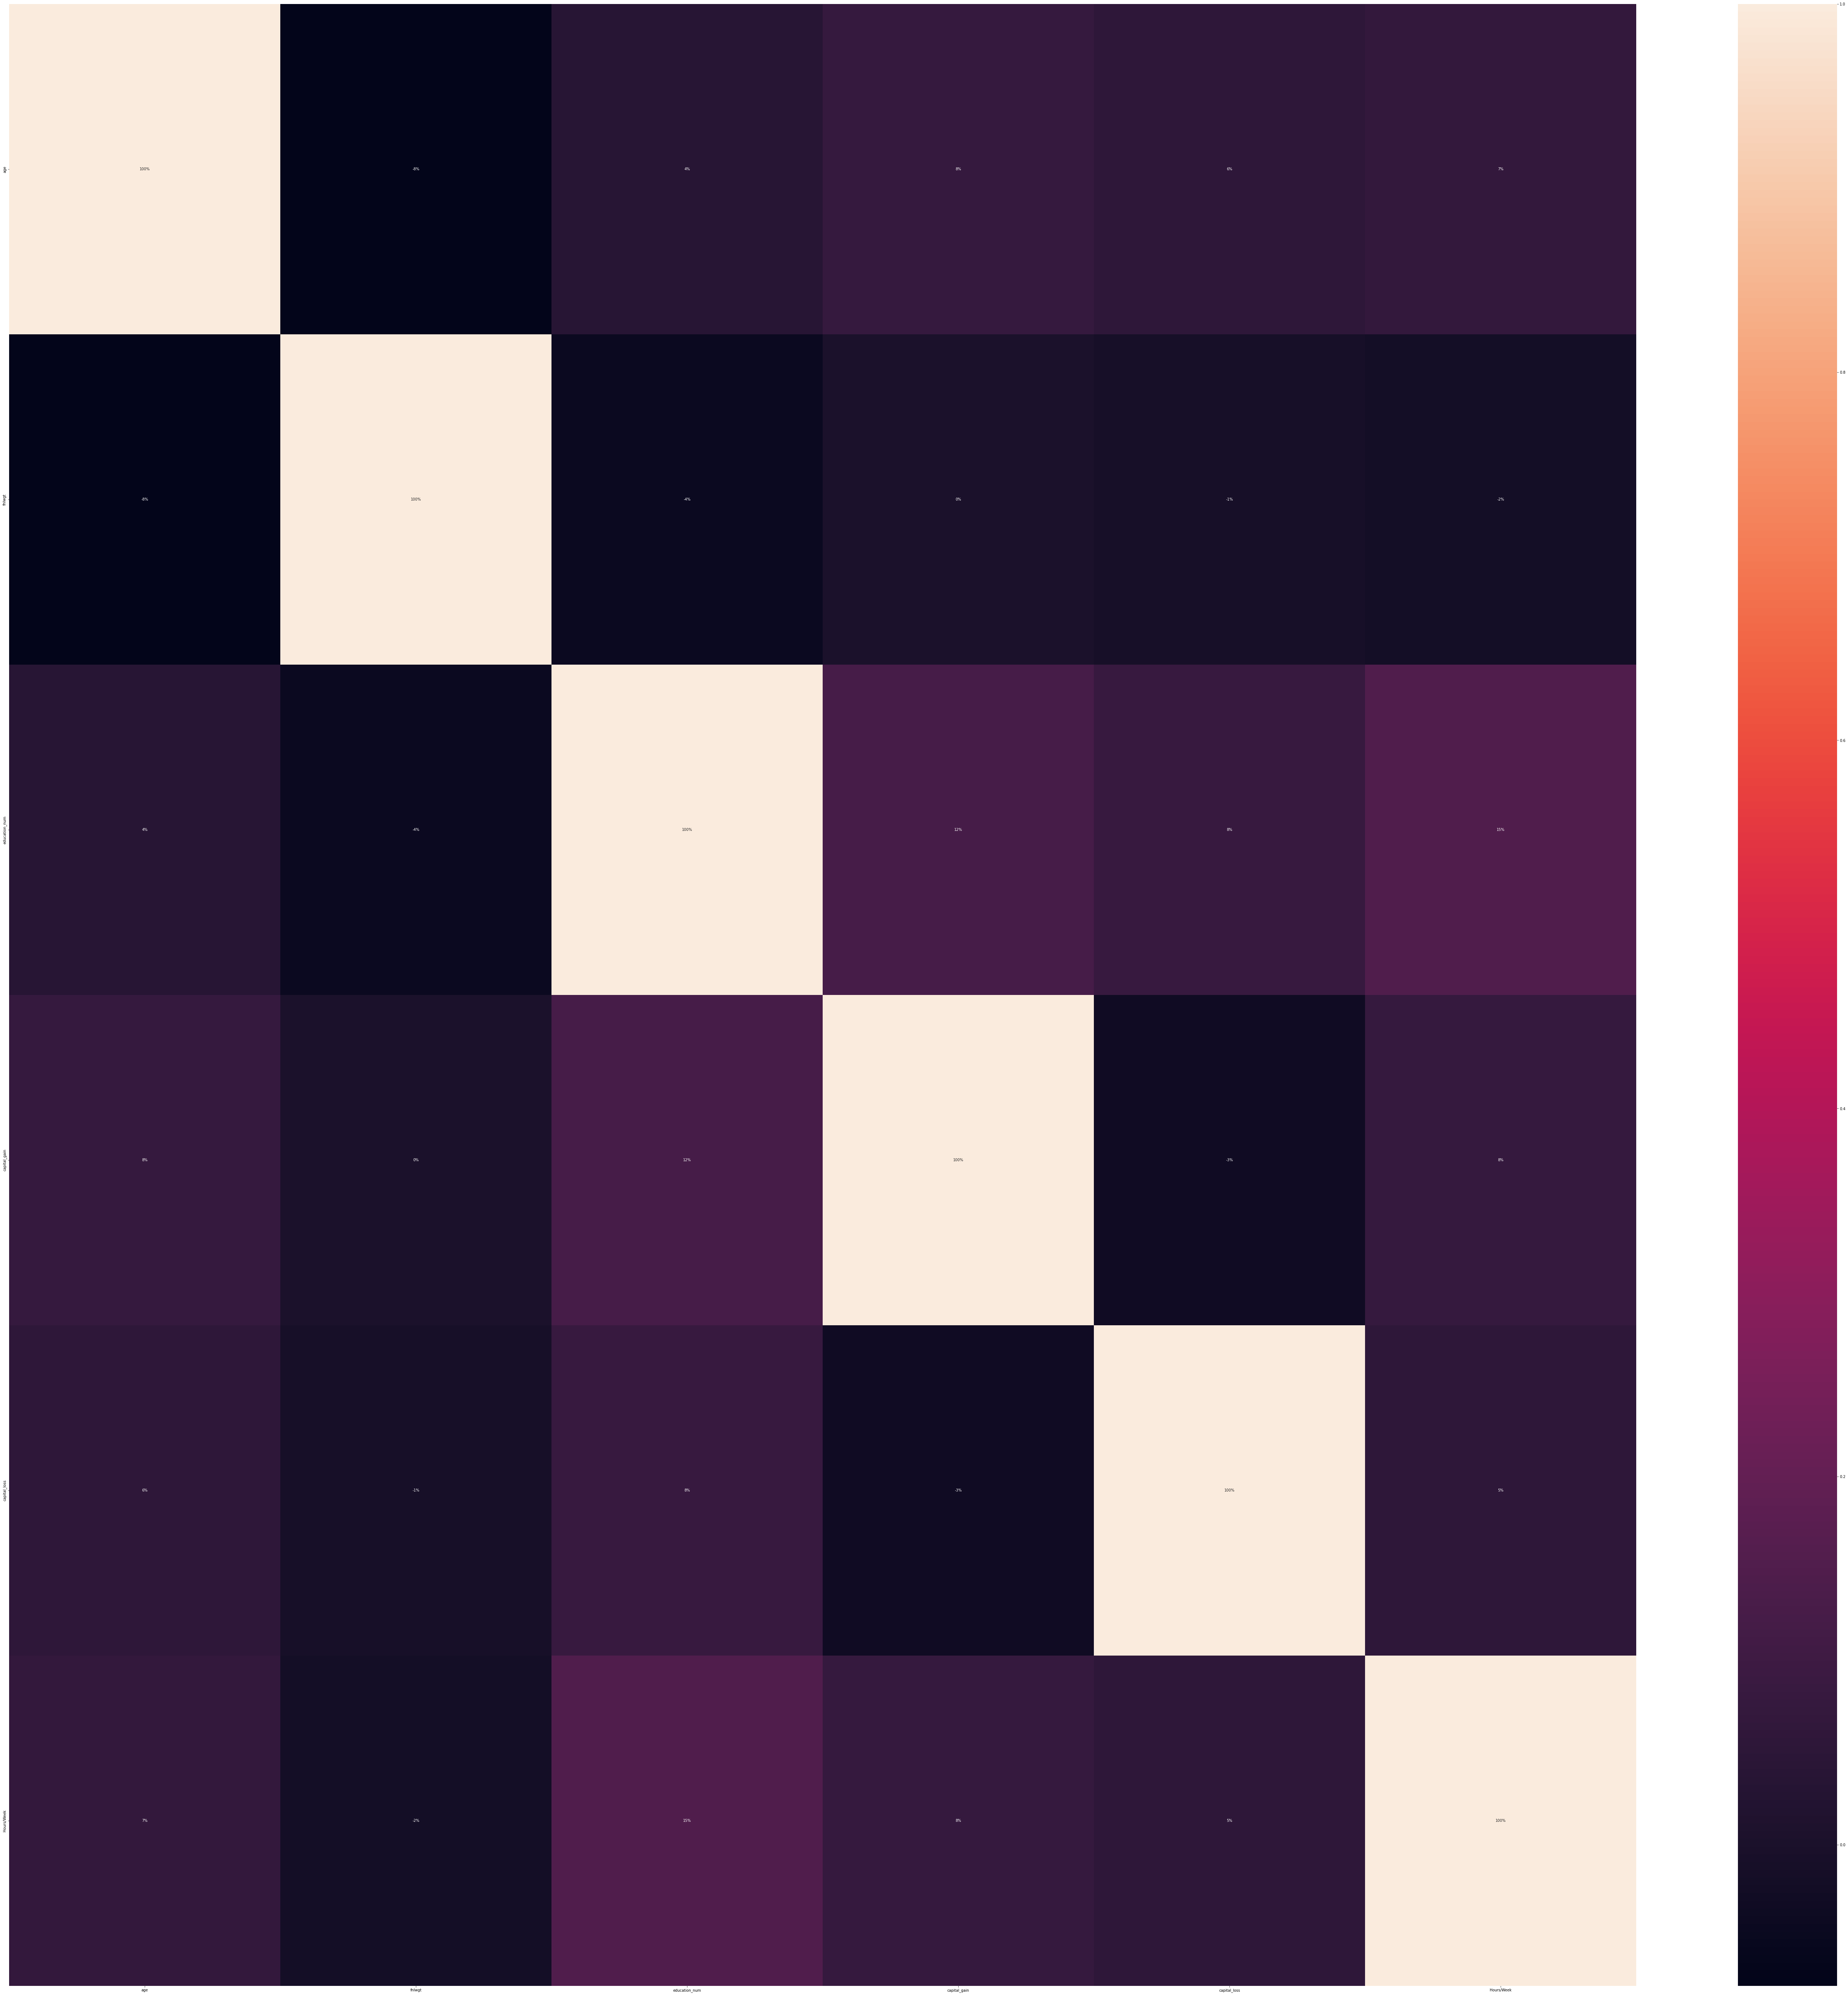

In [8]:
#grafico de analise de heatmap
plt.rcParams['figure.figsize'] = (100, 100)
plt.rcParams['font.size'] = 10

cor = adult_data2.corr()
sns.heatmap(cor, annot=True, fmt='.0%')
plt.show()

### Análise do heatmap:
* idade por capital_gain: analisando a tabela e o heatmap pode-se observar que a idade >= 35 anos há um ganho maior ou igual a 50K anuais
* education_num por capital_gain e hours/week: a população que melhor ganha está na faixa de pesosas que tem um grau de escolaridade maior, e que têm um melhor desempenho diário em seus trabalhos, trabalhando mais de 40 horas semanais.
* países desenvolvidos e sub-dsenvolvidos tem uma taxa difirente da ganhos anuais, e mesmo dentro dos desenvolvividos, a região, idade e escolaridade afetam essa característica.
* no geral, o melhor salário anual encontra-se na parte da população que teve um melhor estudo, tem uma média de trabalho maior do que parte da população, e como visto nos gráficos de distribuição, com idade >= 35.

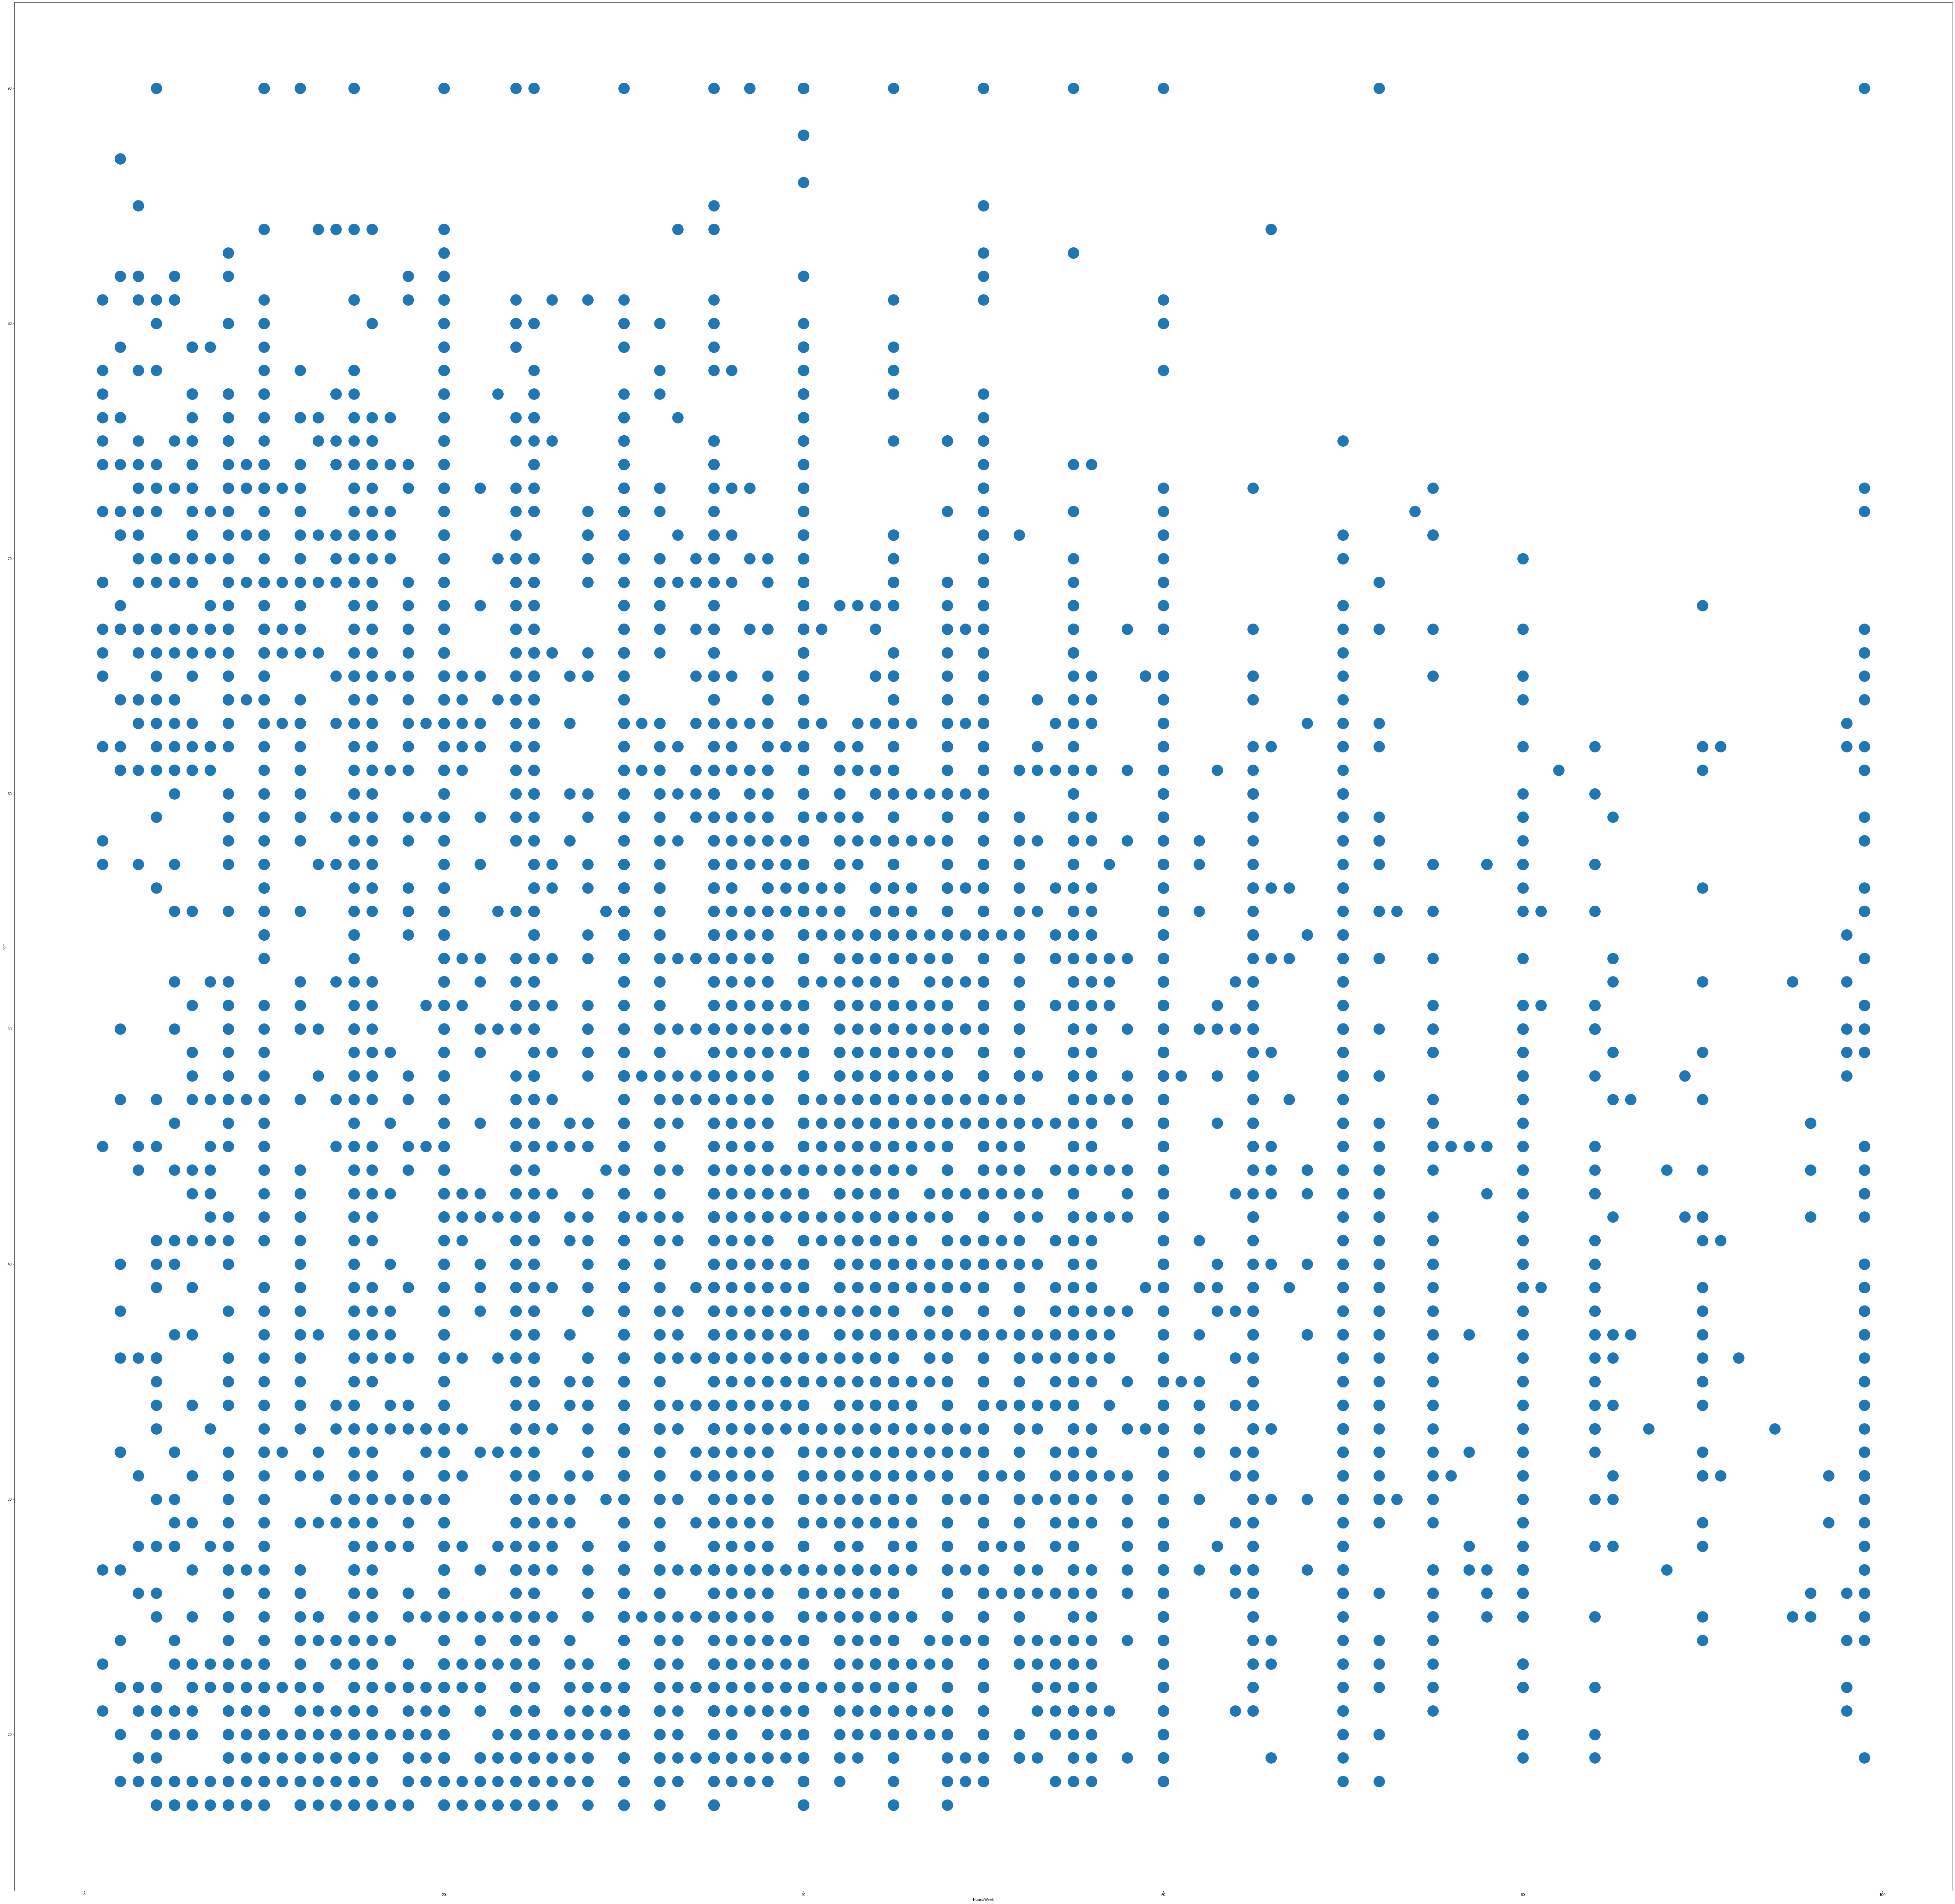

In [65]:
#scatterplot de idade e horas semanais, analisando o gráfico pode-se pobservar uma concetração de horas semanais no 
#intervalo das 30 a 60 horas semanais trabalhadas 
adult_data2.plot.scatter(x = 'Hours/Week', y = 'age', s = 1000);

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education_num'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital_loss'}>,
        <AxesSubplot:title={'center':'Hours/Week'}>]], dtype=object)

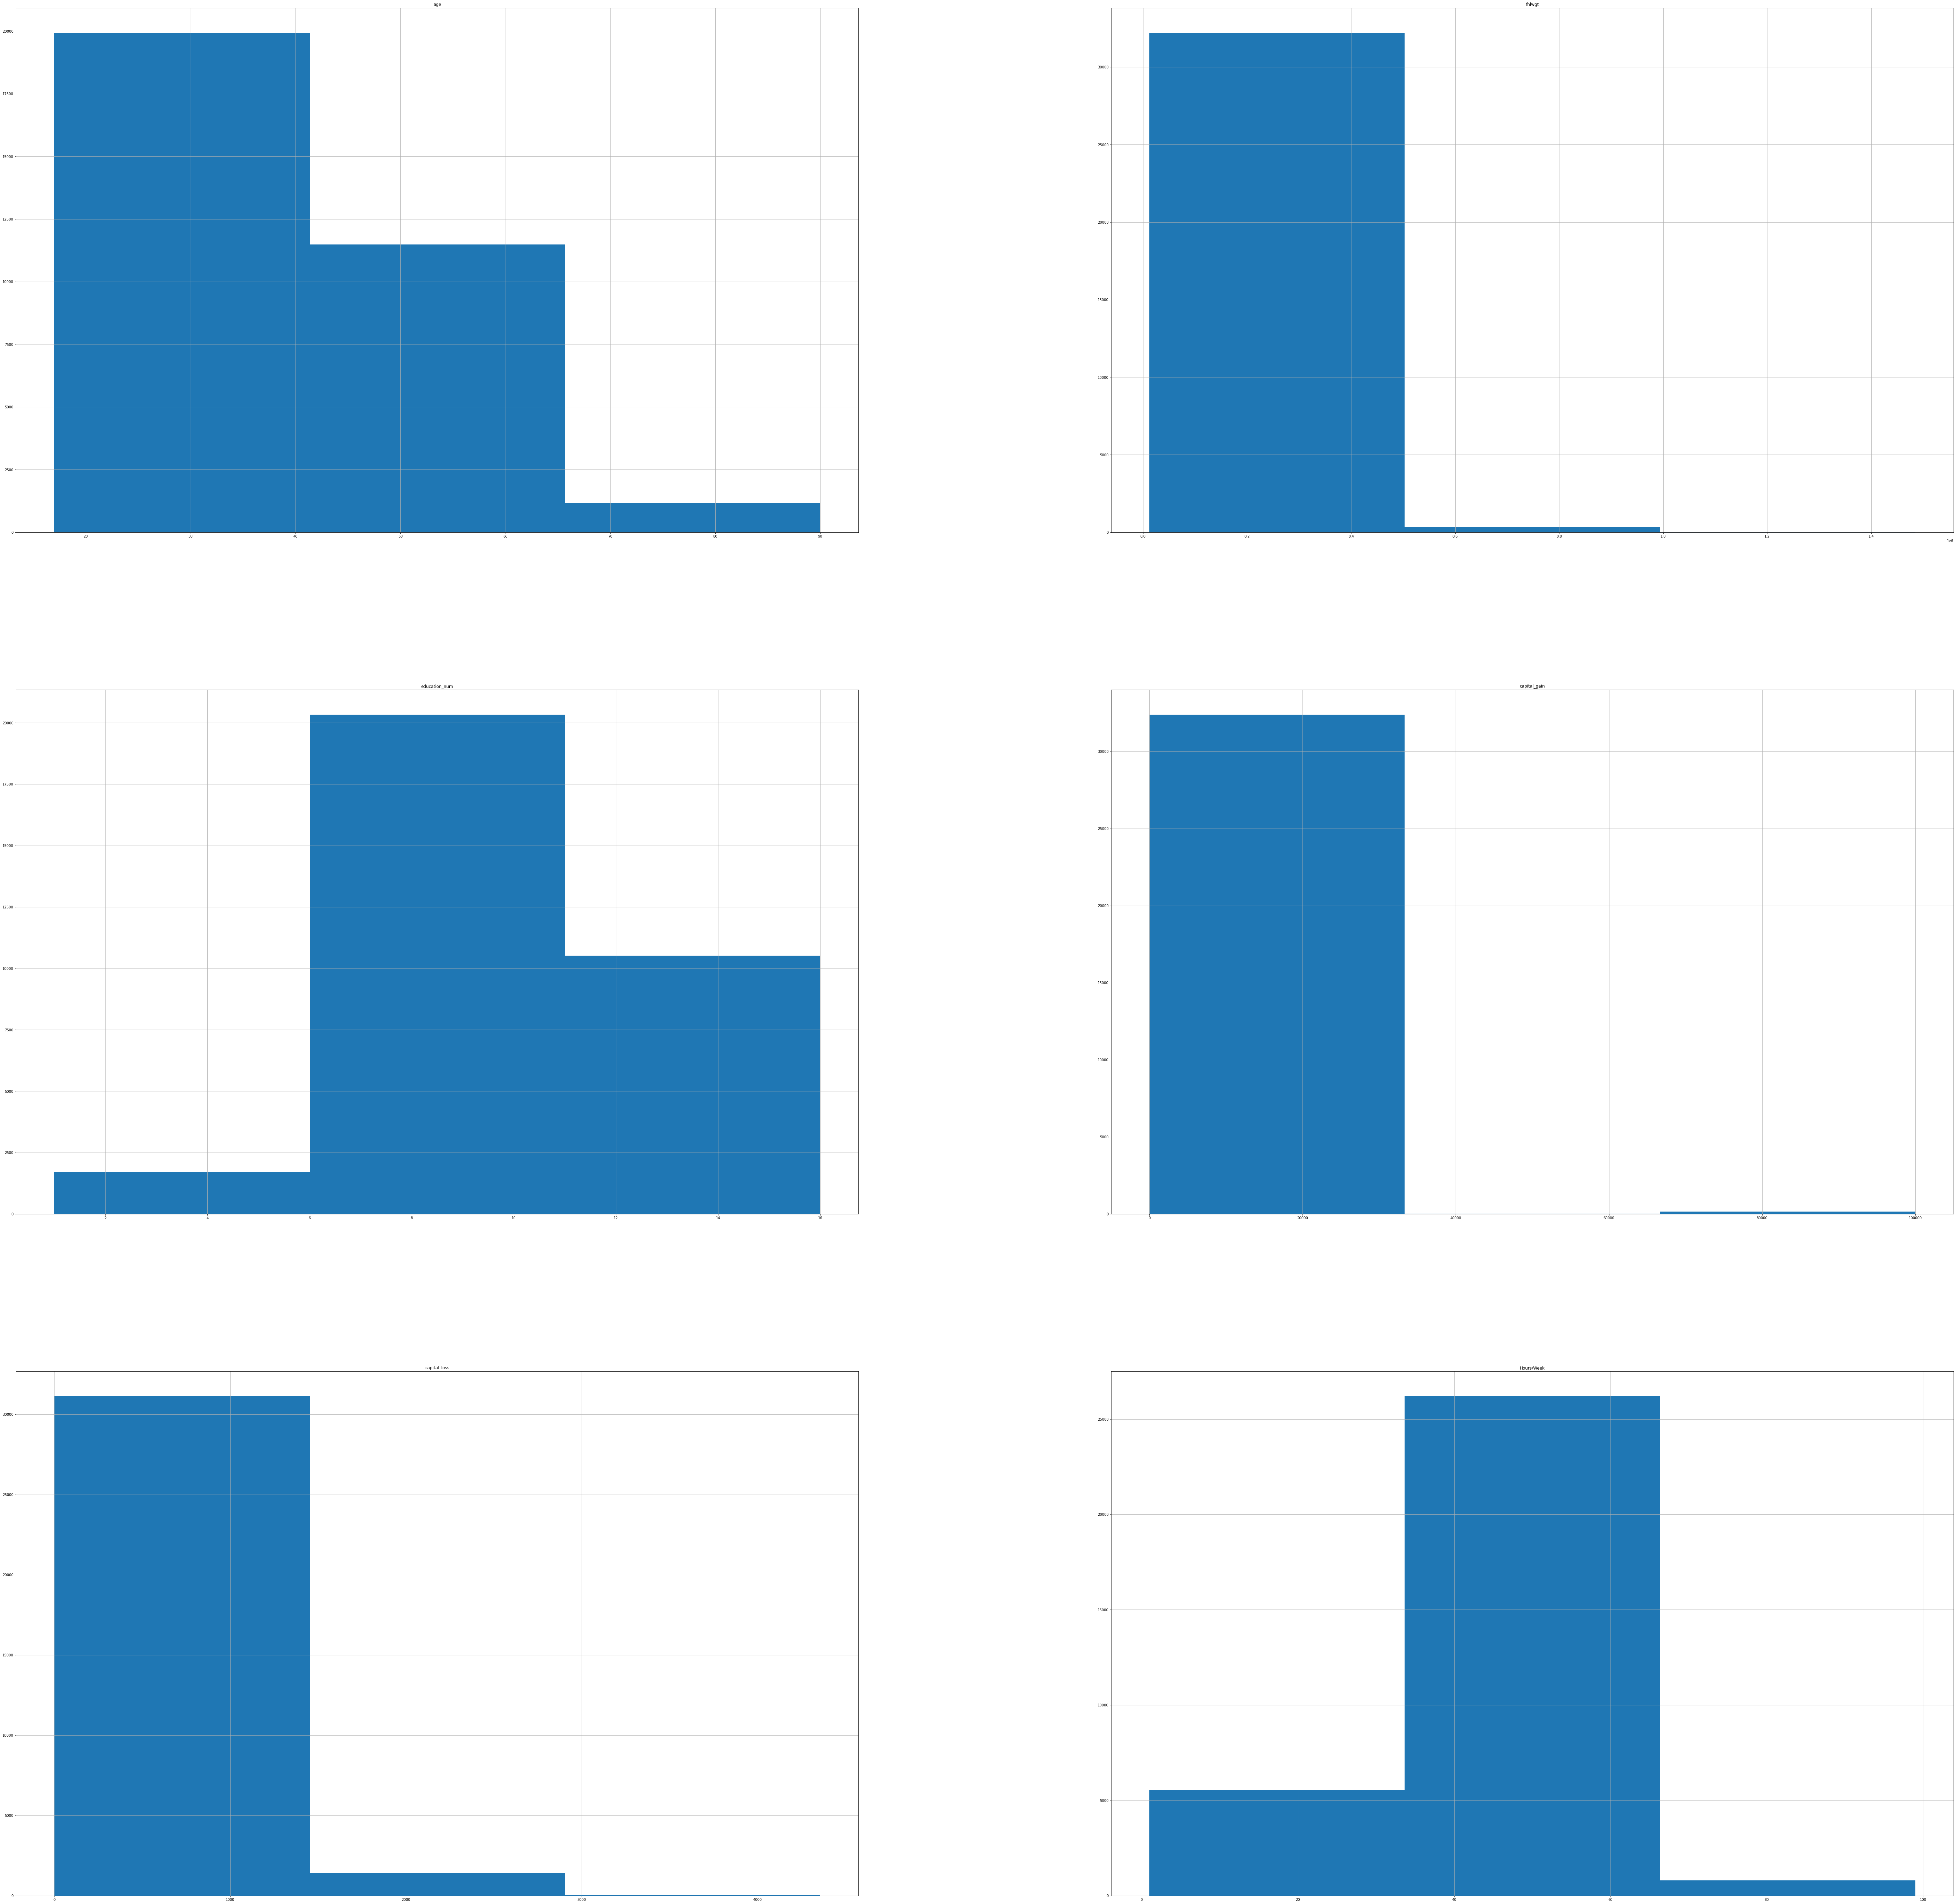

In [41]:
#histograma mostrando caracteristicas especificas das classes. Falando das mais importantes:
#ha uma gradne concetração de idade entre 15 a 42 anos
#concentração de horas trabalhadas entre 30 a 60 horas semanais
adult_data2.hist(bins=3)

<AxesSubplot:ylabel='age'>

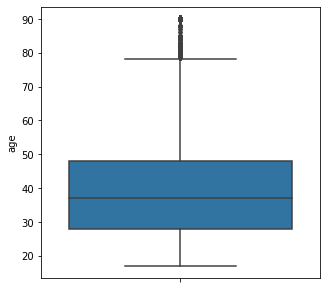

In [56]:
# boxplot da idade, mostrando outliers na classe, acima dos 75 anos
plt.figure(figsize=(5,5))
sns.boxplot(y='age',data=adult_data2)

/Users/marosa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours/Week', ylabel='age'>

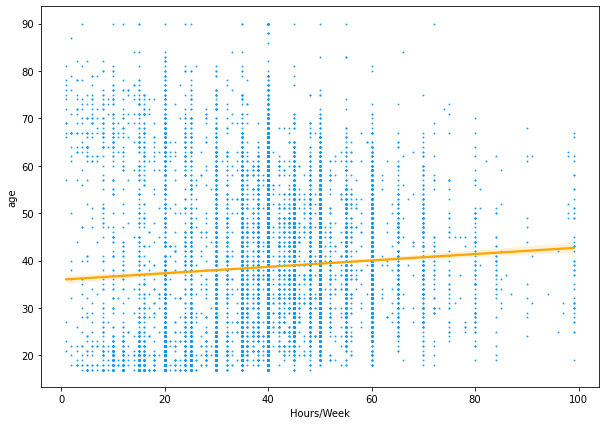

In [50]:
#regplot que demonstra o crescimento de horas trabalhadas ssemanais no intervalo de idade entre 35 a 42 anos
plt.figure(figsize=(10, 7))
df_sample = adult_data2.sample(20000)

sns.regplot(df_sample['Hours/Week'], df_sample['age'],scatter_kws={'s':1, 'color':'#0398fc'}, line_kws={"color": "orange"})

* O que foi notado é que, no intervalo de 35 a 42 anos, encontra-se uma concentração de 35 a 50 horas semanais trabalhadas. Nisso, nota-se que pelo investimento de tempo e maturidade profissional, há uma melhora de ganhos anuais acima de 50K.

/Users/marosa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_gain', ylabel='Hours/Week'>

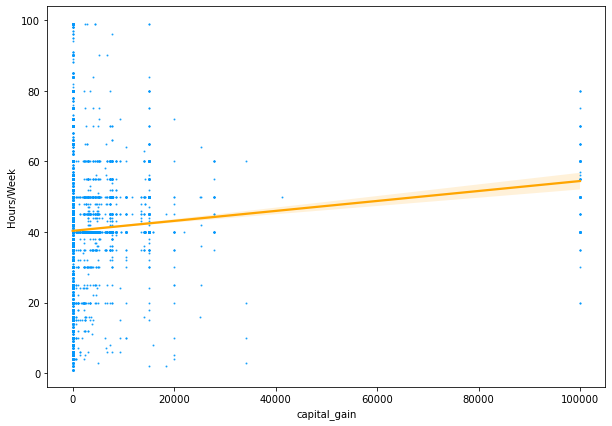

In [58]:
#regplot que demonstra o crescimento de horas semanais trabalhadas e o ganho de capital
plt.figure(figsize=(10, 7))
df_sample = adult_data2.sample(20000)

sns.regplot(df_sample['capital_gain'], df_sample['Hours/Week'],scatter_kws={'s':1, 'color':'#0398fc'}, line_kws={"color": "orange"})

* analisando o gráfico anterior, nota-se o crescimento de ganhos de capital na medida em que as horas semanais crescem, no intervalo entre 40 a 50 horas.

#regplot que demonstra o ganho de capital pelos paises de origem.
plt.figure(figsize=(10, 7))
df_sample = adult_data2.sample(20000)

sns.regplot(df_sample['capital_gain'], df_sample['native_country'],scatter_kws={'s':1, 'color':'#0398fc'}, line_kws={"color": "orange"})

* Ha uma grande concentração de ganho de capital pelos estados unidos, e países desenvolvidos.